<a href="https://colab.research.google.com/github/Movya777/EDA_and_Feature_Engineering/blob/main/%F0%9F%9A%A2Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset link: https://www.kaggle.com/competitions/titanic/data

This notebook is all about handling missing values in numerical data. Specifically about using different techniques at different scenarios.

Techniques used
1. Mean/Median/Mode Imputation
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of distrubution imputation
5. Arbitrary value imputation

In [3]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Practice Datasets/titanic/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Missing Values

# Technique 1 - Mean/Median/Mode Imputation

In [6]:
data=pd.read_csv('/content/drive/MyDrive/Practice Datasets/titanic/train.csv',usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
# Lets check the percentage of missing values
data.isnull().mean()

,0
Survived,0.000000
Age,0.198653
Fare,0.000000


In [14]:
def impute_nan(dataframe,feature,median):
  data[feature+"_new"]=data[feature].fillna(median)

In [15]:
# Lets impute Age with "median"
median=data['Age'].median()
print("Median of Age is:", median)

Median of Age is: 28.0


In [16]:
impute_nan(data,'Age',median)

In [17]:
data.head()

,Survived,Age,Fare,Age_new
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [18]:
# lets see the change in standard deviation of Age column
print("Standard Deviation old - " ,data['Age'].std())
print("Standard Deviation new - " ,data['Age_new'].std())

Standard Deviation old -  14.526497332334044
Standard Deviation new -  13.019696550973194


Since there is a minimal difference in deviations, its good

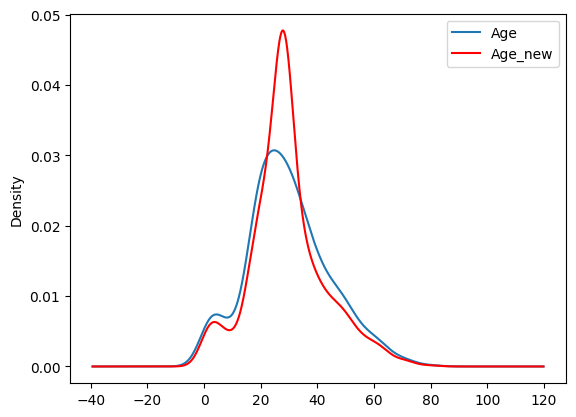

In [19]:
# lets see plots for the distribution of Age and Age_new
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure() #Creates a new figure for plotting.
ax=fig .add_subplot(111) #Adds a subplot to the figure.
# The 111 indicates a single subplot (1 row, 1 column, and this is the first subplot).
data['Age'].plot(kind='kde',ax=ax)
data['Age_new'].plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

The density of certain values in the moddle increased, since we imputed the NAN values with median

Advantages of mean/median imputation
1. Easy to implement (Robust to outliers)
2. Faster way to obtain complete dataset

Disadvantages
1. change/distortion of original variance
2. Impacts correlation

# Technique 2 - Ramdom Sample Imputation

This technique is similar to mean/medain/mode imputation.

The only difference is that, this technique used random samples and compute the respective method

When to use?
Misssing data is due to MCAR

In [20]:
data2=pd.read_csv('/content/drive/MyDrive/Practice Datasets/titanic/train.csv',usecols=['Age','Fare','Survived'])

In [21]:
# fetching random sample
data2['Age'].dropna().sample(data2['Age'].isnull().sum(),random_state=0)
# data2['Age'].isnull().sum() --> gives the count of nan values
# The above code generates the count of nan values to use them for replacing
# random_state=0 ensures reproducibility,
#meaning the same random samples are selected every time the code runs.

,Age
423,28.00
177,50.00
305,0.92
292,36.00
889,26.00
...,...
539,22.00
267,25.00
352,15.00
99,34.00


In [22]:
data2[data2['Age'].isnull()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [27]:
def impute_nan(df,feature,median):
  df[feature+"_median"]=df[feature].fillna(median)
  df[feature+"_random"]=df[feature]
  random_sample=df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)
  #pandas need same index in order to merge the dataset
  random_sample.index=df[df[feature].isnull()].index # redefining the random_sample index
  df.loc[df[feature].isnull(),feature+"_random"]=random_sample

In [28]:
median=data2['Age'].median()

In [29]:
impute_nan(data2,'Age',median)

In [31]:
data2.head(30)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.00
1,1,38.0,71.2833,38.0,38.00
2,1,26.0,7.9250,26.0,26.00
3,1,35.0,53.1000,35.0,35.00
4,0,35.0,8.0500,35.0,35.00
5,0,NaN,8.4583,28.0,28.00
6,0,54.0,51.8625,54.0,54.00
7,0,2.0,21.0750,2.0,2.00
8,1,27.0,11.1333,27.0,27.00
9,1,14.0,30.0708,14.0,14.00


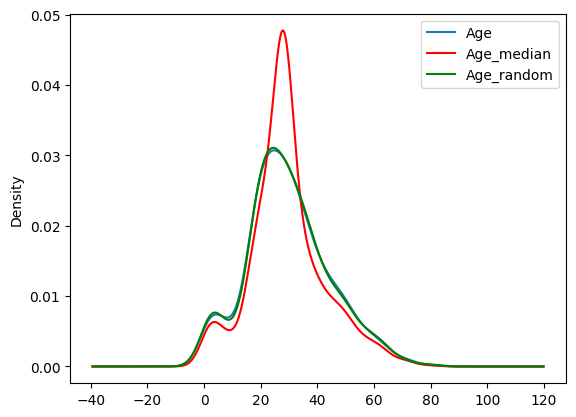

In [33]:
# lets see plots for the distribution of Age and Age_new
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure() #Creates a new figure for plotting.
ax=fig .add_subplot(111) #Adds a subplot to the figure.
# The 111 indicates a single subplot (1 row, 1 column, and this is the first subplot).
data2['Age'].plot(kind='kde',ax=ax)
data2['Age_median'].plot(kind='kde',ax=ax,color='red')
data2['Age_random'].plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

Age and Age_random curves are almost same.

The standard deviation distortion problem is solved with random sampling imputation

Advantages:
1. easy to implement
2. Less distortion in variance

Disadvantages:
1. Not in every case, randomness works

So, give it a try and check



# Technique 3 - Capturing NAN values with a new feature

In [34]:
data3=pd.read_csv('/content/drive/MyDrive/Practice Datasets/titanic/train.csv',usecols=['Age','Fare','Survived'])

In [35]:
data3['Age_NAN']=np.where(data3['Age'].isnull(),1,0)

In [36]:
data3['Age'].fillna(df['Age'].median(),inplace=True)

<ipython-input-36-cff3aea3d700>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data3['Age'].fillna(df['Age'].median(),inplace=True)


Though the NAN values are replaced with median, by creating a new feature, model will come to know that due to the presence of 1 for NAN values, something different has happened.

Advantages:
1. Easy to implement
2. captures the importance of missing values

Disadvantages:
1. if "n" columns have nan values, this technique creates, "n" additional  leading to Curse of Dimensionality

# Technique 4 - End of distribution imputation

In [4]:
data4=pd.read_csv('/content/drive/MyDrive/Practice Datasets/titanic/train.csv',usecols=['Age','Fare','Survived'])

<Axes: >

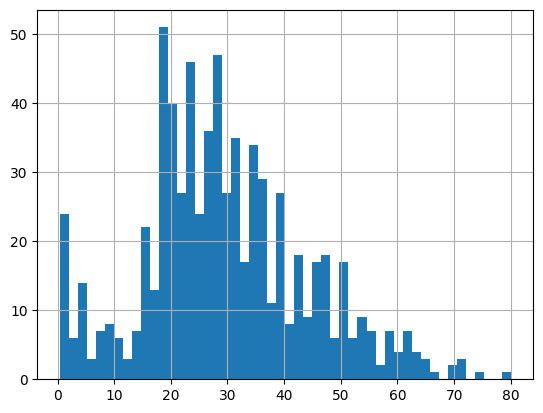

In [5]:
data4['Age'].hist(bins=50)

I'm gonna consider the far end of the distribution which is on the rightmost side

In [7]:
mean= data4['Age'].mean()

In [8]:
# fetching the value of third standard deviation
mean+3*data4['Age'].std()
# to find out standard deviation value, we add mean because,
#if we do not add, it gives us the first std value from left

73.27860964406095

In [12]:
print("mean",mean)
print("SD",data4['Age'].std())
print("1st sd", data4['Age'].std())
print("2nd sd", 2*data4['Age'].std())
print("3rd sd", 3*data4['Age'].std())

mean 29.69911764705882
SD 14.526497332334044
1st sd 14.526497332334044
2nd sd 29.052994664668088
3rd sd 43.57949199700213


In [11]:
print("mean",mean)
print("1st sd", mean+data4['Age'].std())
print("2nd sd", mean+2*data4['Age'].std())
print("3rd sd", mean+3*data4['Age'].std())

mean 29.69911764705882
1st sd 44.225614979392866
2nd sd 58.752112311726904
3rd sd 73.27860964406095


<Axes: xlabel='Age'>

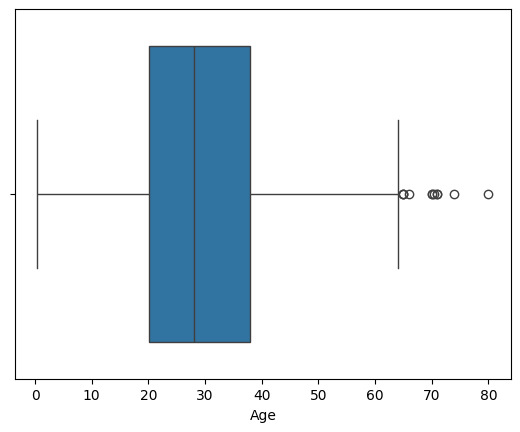

In [16]:
import seaborn as sns
sns.boxplot(x='Age', data=data4)

Since, we have outliers in the right most, we consider right end values

In [17]:
def impute_nan(df,feature,median,extreme):
   df[feature+"_median"]=df[feature].fillna(median)
   df[feature+"_extreme"]=df[feature].fillna(extreme)

In [18]:
median=data4['Age'].median()
extreme= mean+3*data4['Age'].std()

In [19]:
impute_nan(data4,'Age',median,extreme)

In [20]:
data4.head()

,Survived,Age,Fare,Age_median,Age_extreme
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


<Axes: xlabel='Age_extreme'>

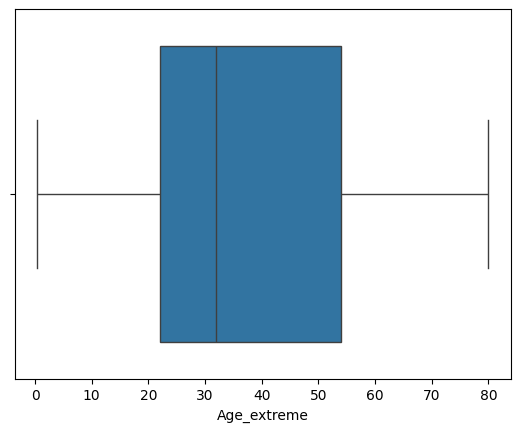

In [23]:
sns.boxplot(x='Age_extreme', data=data4)

Outliers are gone!!!!!

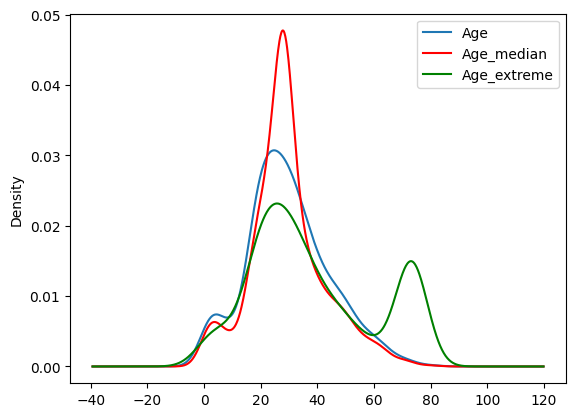

In [22]:
# lets see plots for the distribution of Age and Age_new
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure() #Creates a new figure for plotting.
ax=fig .add_subplot(111) #Adds a subplot to the figure.
# The 111 indicates a single subplot (1 row, 1 column, and this is the first subplot).
data4['Age'].plot(kind='kde',ax=ax)
data4['Age_median'].plot(kind='kde',ax=ax,color='red')
data4['Age_extreme'].plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

Advantages:
1. captures the importance of missigness if there is one

# Technique 5 - Arbitrary Value Imputation

This technique was derived from kaggle competition.

Replaces the NAN values with arbitrary value

In [24]:
data5=pd.read_csv('/content/drive/MyDrive/Practice Datasets/titanic/train.csv',usecols=['Age','Fare','Survived'])

In [25]:
def impute_nan(df,feature):
  df[feature+'zero']=df[feature].fillna(0)
  df[feature+'hundered']=df[feature].fillna(100)

In [26]:
impute_nan(data5,'Age')
data5.head()

,Survived,Age,Fare,Agezero,Agehundered
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
